# [[데이콘] 소비자 데이터 기반 소비 예측 경진대회](https://dacon.io/competitions/official/235893/overview/description)
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/소비 예측 경진대회/train.csv')
test = pd.read_csv('data/소비 예측 경진대회/test.csv')

In [3]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [5]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [6]:
train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'target']].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,2525.000000


In [7]:
train[['Education']].value_counts(), train[['Education']].value_counts(normalize=True)

(Education 
 Graduation    570
 PhD           254
 Master        173
 2n Cycle       89
 Basic          22
 dtype: int64,
 Education 
 Graduation    0.514440
 PhD           0.229242
 Master        0.156137
 2n Cycle      0.080325
 Basic         0.019856
 dtype: float64)

In [8]:
train[['Marital_Status']].value_counts(), train[['Marital_Status']].value_counts(normalize=True)

(Marital_Status
 Married           415
 Together          296
 Single            234
 Divorced          120
 Widow              39
 Alone               2
 Absurd              1
 YOLO                1
 dtype: int64,
 Marital_Status
 Married           0.374549
 Together          0.267148
 Single            0.211191
 Divorced          0.108303
 Widow             0.035199
 Alone             0.001805
 Absurd            0.000903
 YOLO              0.000903
 dtype: float64)

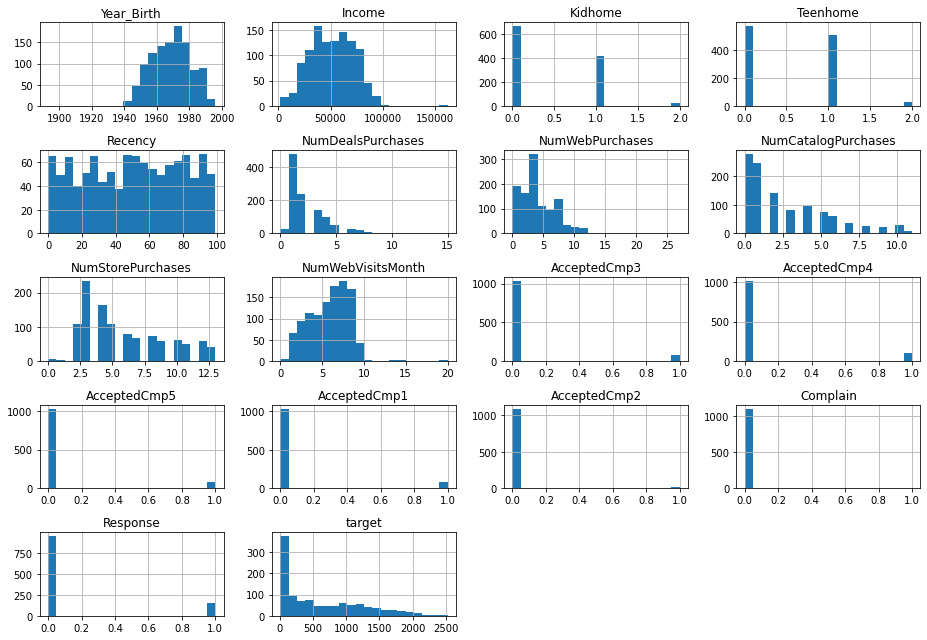

In [9]:
train.iloc[:, 1:].hist(bins = 20, figsize = (13, 9))
plt.tight_layout()
plt.show()

<Figure size 1152x1368 with 0 Axes>

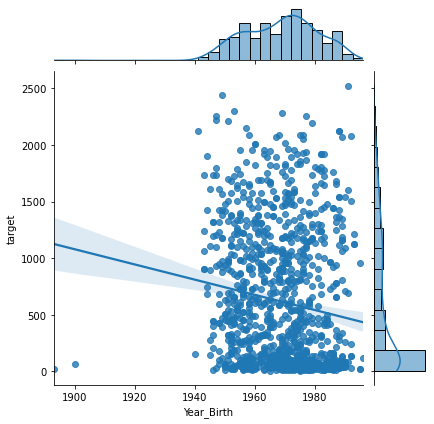

In [10]:
plt.figure(figsize = (16, 19))
sns.jointplot(x = train['Year_Birth'], y = train['target'], kind='reg')
plt.show()

가장 최근에 태어난 사람일 수록 제품 총 소비량이 작다.

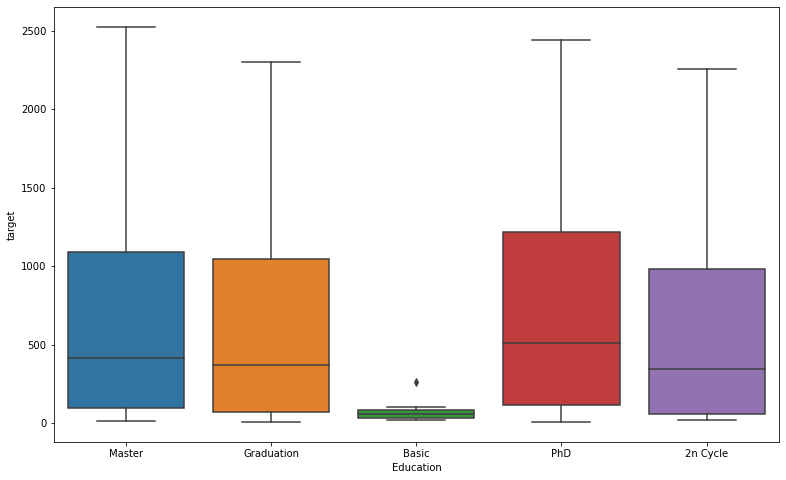

In [15]:
plt.figure(figsize = (13, 8))
sns.boxplot(data = train, x = 'Education', y='target');

AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  
Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0  
Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0  

In [16]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [31]:
print(pd.pivot_table(train, index = 'AcceptedCmp1', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp2', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp3', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp4', values='target', aggfunc=['mean', 'sum']))
print('\n')
print(pd.pivot_table(train, index = 'AcceptedCmp5', values='target', aggfunc=['mean', 'sum']))

                     mean     sum
                   target  target
AcceptedCmp1                     
0              558.000969  575857
1             1419.921053  107914


                     mean     sum
                   target  target
AcceptedCmp2                     
0              607.331806  662599
1             1245.411765   21172


                    mean     sum
                  target  target
AcceptedCmp3                    
0             610.405432  629328
1             707.051948   54443


                     mean     sum
                   target  target
AcceptedCmp4                     
0              569.679171  577085
1             1123.010526  106686


                     mean     sum
                   target  target
AcceptedCmp5                     
0              540.003891  555124
1             1608.087500  128647


캠페인 횟수와 제안 수락 여부에 따른 제품 총 소비량의 평균과 합을 보면 제안을 수락하지 않았을 때 소비량이 더 많았다.  
캠페인 횟수는 상관이 없는 것으로 파악한다.

In [32]:
print(pd.pivot_table(train, index = 'Complain', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Complain                    
0         620.501821  681311
1         246.000000    2460


고객이 지난 2년 동안 불만을 제기한 경험이 있으면 제품 총 소비량이 현저히 줄어든다.

In [33]:
print(pd.pivot_table(train, index = 'Response', values='target', aggfunc=['mean', 'sum']))

                mean     sum
              target  target
Response                    
0         557.613039  530290
1         977.585987  153481


In [3]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [5]:
train[['Dt_Customer']]

,Dt_Customer
0,21-01-2013
1,24-05-2014
2,08-04-2013
3,29-03-2014
4,10-06-2014
...,...
1103,31-03-2013
1104,21-10-2013
1105,16-12-2013
1106,30-05-2013


In [10]:
# year, month, day 변수 생성
year, month, day = [], [], []
for i in range(len(train['Dt_Customer'])):
    day.append(int(train['Dt_Customer'][i].split('-')[0]))
    month.append(int(train['Dt_Customer'][i].split('-')[1]))
    year.append(int(train['Dt_Customer'][i].split('-')[2]))

In [15]:
train['year']=year
train['month']=month
train['day']=day

In [19]:
week_day = pd.to_datetime(train['Dt_Customer']).dt.day_name()
train['week_day'] = week_day
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,541,2013,1,21,Monday
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,899,2014,5,24,Saturday
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,901,2013,4,8,Sunday
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,50,2014,3,29,Saturday
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,1,0,0,0,444,2014,6,10,Monday


In [21]:
# 고객이 회사에 등록한 나이
train['Customer_age'] = train['year'] - train['Year_Birth']

In [22]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day,Customer_age
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,541,2013,1,21,Monday,39
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,899,2014,5,24,Saturday,52
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,901,2013,4,8,Sunday,62
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,50,2014,3,29,Saturday,40
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,1,0,0,0,444,2014,6,10,Monday,68


<Figure size 1152x1368 with 0 Axes>

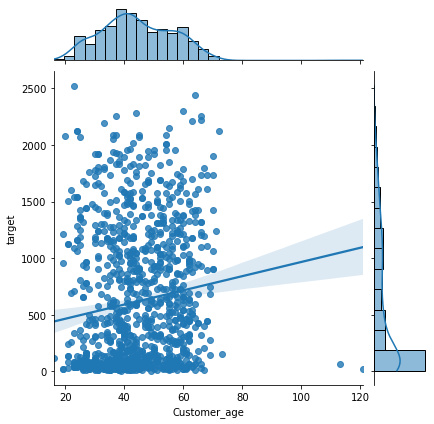

In [25]:
plt.figure(figsize = (16, 19))
sns.jointplot(data = train, x = 'Customer_age', y = 'target', kind='reg')
plt.show()

고객이 회사에 등록한 나이가 증가할수록 제품 총 소비량이 증가한다.

In [26]:
# Dt_Customer 변수 삭제
train.drop(columns=['Dt_Customer', 'id'], inplace = True)
train.head(3)

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,week_day,Customer_age
0,0,1974,Master,Together,46014.0,1,1,21,10,7,...,0,0,0,0,541,2013,1,21,Monday,39
1,1,1962,Graduation,Single,76624.0,0,1,68,1,5,...,0,0,0,0,899,2014,5,24,Saturday,52
2,2,1951,Graduation,Married,75903.0,0,1,50,2,6,...,0,0,0,0,901,2013,4,8,Sunday,62


In [30]:
train_number = train.select_dtypes(np.number) #상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑는다.
train_number.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'target', 'year', 'month', 'day',
       'Customer_age'],
      dtype='object')

In [31]:
corr = train_number.corr()
corr

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,Customer_age
Year_Birth,1.000000,-0.215129,0.250717,-0.341926,-0.000585,-0.086073,-0.165842,-0.166729,-0.131844,0.094419,...,-0.010873,-0.050053,-0.034204,-0.072640,-0.012304,-0.136035,-0.006035,-0.009237,0.001894,-0.998515
Income,-0.215129,1.000000,-0.491682,0.056695,0.019414,-0.130339,0.492198,0.686210,0.624833,-0.649677,...,0.386911,0.331249,0.095179,-0.047230,0.168187,0.784084,0.015924,-0.022077,-0.018073,0.215607
Kidhome,0.250717,-0.491682,1.000000,-0.061787,0.021386,0.221077,-0.357380,-0.513311,-0.490137,0.415928,...,-0.181396,-0.154852,-0.084872,0.047319,-0.068564,-0.538365,0.083992,-0.030244,-0.006173,-0.245685
Teenhome,-0.341926,0.056695,-0.061787,1.000000,0.017762,0.408364,0.171656,-0.092944,0.054837,0.129008,...,-0.157719,-0.154723,0.017320,0.015277,-0.128335,-0.109214,-0.018549,-0.006526,-0.007570,0.340295
Recency,-0.000585,0.019414,0.021386,0.017762,1.000000,0.009642,0.018566,0.060115,0.001619,-0.015293,...,-0.003057,-0.012511,0.011958,0.023450,-0.188319,0.050873,-0.068498,0.063269,0.003919,-0.003148
NumDealsPurchases,-0.086073,-0.130339,0.221077,0.408364,0.009642,1.000000,0.241110,-0.080178,0.090900,0.378053,...,-0.167222,-0.130134,-0.010467,0.007893,0.024944,-0.072802,-0.162094,-0.016171,0.002079,0.077085
NumWebPurchases,-0.165842,0.492198,-0.357380,0.171656,0.018566,0.241110,1.000000,0.441689,0.503802,-0.085937,...,0.141840,0.133468,0.025798,-0.033431,0.153009,0.546082,-0.155049,0.011825,0.027120,0.157093
NumCatalogPurchases,-0.166729,0.686210,-0.513311,-0.092944,0.060115,-0.080178,0.441689,1.000000,0.554084,-0.513101,...,0.330798,0.316680,0.100666,-0.047544,0.236083,0.798065,-0.112692,0.018612,-0.003437,0.160286
NumStorePurchases,-0.131844,0.624833,-0.490137,0.054837,0.001619,0.090900,0.503802,0.554084,1.000000,-0.429612,...,0.187345,0.154700,0.072446,-0.060784,0.032006,0.677785,-0.124251,0.024237,-0.016303,0.124835
NumWebVisitsMonth,0.094419,-0.649677,0.415928,0.129008,-0.015293,0.378053,-0.085937,-0.513101,-0.429612,1.000000,...,-0.253650,-0.204194,0.021618,0.021898,0.006787,-0.488252,-0.222735,0.054944,0.016755,-0.106384
